<a href="https://colab.research.google.com/github/rrezendes/marketing_campaign/blob/master/iFood_exploratory_analysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IFood Test





Data Business Analist Test 

Requirements: Google account. 

Please follow the steps. Any doubt please contact me. 

**What will you find here?**

An advanced exploratory analisys involving an specific database ifood test. 

Sumary:
1. Libraries, Connections and File Import
2. Data preparation
3. Descriptive statistics

## 1. Libraries, Connections, Functions and File Import

### 1.1. Libraries

In [0]:
#@title Libraries importing
#@libraries
#importing libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pydrive to google drive connection
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2. Connections

Please execute the cell above (Authentication) and click on the google link that will generate a verification code. 

Allow your google account connect in this google colab and consequently connect the csv file on google drive. 

In [0]:
#@title Authentication
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### 1.3. Functions


In [0]:
#@title #### Histogram and ECDF function

def ecdf(data):
	percentiles = []
	n = len(data)
	sort_data = np.sort(data)
	for i in np.arange(1, n+1):
		p = i/n
		percentiles.append(p)
	return sort_data, percentiles

def plot_doble_ecdf(x_input, title_hist, xmark, ymark, title_ecdf, hist_bins=10, hist_range=(0,100),ecdf_step_x=10,start_x=0.00):
    x,y = ecdf(x_input)
    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(121)
    plt.hist(x_input,bins=hist_bins,range=hist_range)
    ax1.title.set_text(title_hist)

    ax2 = fig.add_subplot(122)
    plt.plot(x,y, linestyle='none', marker='.')
    plt.yticks(np.arange(start=0.00, stop=max(y)+0.1, step=0.1))
    plt.xticks(np.arange(start=start_x, stop=max(x)+1, step=ecdf_step_x))
    plt.axvline(x=xmark, color='red')
    plt.axhline(y=ymark, color='red')
    ax2.title.set_text(title_ecdf)

### 1.4. File import


In [0]:
#@title Reading the file
#google drive file link (ml_project1_data.csv)
link = 'https://drive.google.com/open?id=1EcraG_N9CYY-YPnf9AHCyag9GtKMl9oF' # The shareable link

#takes the file ID
fluff, id = link.split('=')

#download and csv read
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ifood_file_test.csv')  
csv_base = pd.read_csv('ifood_file_test.csv')

In [0]:
csv_base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 2. Data preparation

In [0]:
#@title Transformation
#create new dataframe based on csv_base dataframe
df = csv_base

#removing income up to 200k 
df = df[df['Income']<=200000].copy()
df['Income_K'] = df['Income']/1000

In [0]:
#@title ####New fields


#create new fields to analysis
df['Age'] = 2020 - df['Year_Birth']
df['Peoplehome'] = df['Teenhome'] + df['Kidhome']
df['LifetimeDays'] =  (np.datetime64('today') - df['Dt_Customer'].astype('datetime64[ns]')).dt.days
df['LifetimeYears'] = df['LifetimeDays']/355
df['MntTotal'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['NumTotalPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['AvgPrice'] = df['MntTotal'] / df['NumTotalPurchases']
df['AvgMntLifetimeYear'] = df['MntTotal'] / (df['LifetimeYears'])
df['AvgPurchaseLifetimeYear'] = df['NumTotalPurchases'] / (df['LifetimeYears'])
df['TotalCmpAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['AcceptedAnyCmp'] = df['TotalCmpAccepted']>0

age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
df['Age_Range'] = pd.cut(df['Age'], age_bins)

income_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
df['Income_Range'] = pd.cut(df['Income_K'], income_bins)

In [0]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_K,Age,Peoplehome,LifetimeDays,LifetimeYears,MntTotal,NumTotalPurchases,AvgPrice,AvgMntLifetimeYear,AvgPurchaseLifetimeYear,TotalCmpAccepted,AcceptedAnyCmp,Age_Range,Income_Range
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58.138,63,0,2807,7.907042,1529,22,69.500000,193.371927,2.782330,0,False,"(60, 70]","(50, 60]"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,46.344,66,2,2257,6.357746,21,4,5.250000,3.303057,0.629154,0,False,"(60, 70]","(40, 50]"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,71.613,55,0,2456,6.918310,734,20,36.700000,106.095277,2.890879,0,False,"(50, 60]","(70, 80]"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,26.646,36,1,2283,6.430986,48,6,8.000000,7.463863,0.932983,0,False,"(30, 40]","(20, 30]"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,58.293,39,1,2305,6.492958,407,14,29.071429,62.683297,2.156182,0,False,"(30, 40]","(50, 60]"


## 3. Descriptive Statistics

Analysis of quantitative and qualitative variables. 

### 3.1. Education



- About 90% has graduation or higher education

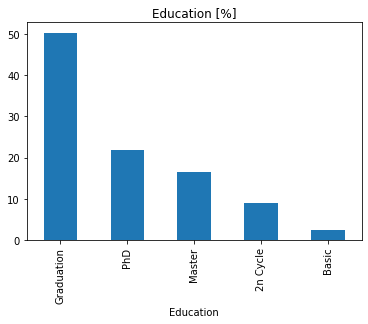

In [0]:
#@title ####Bar chart


(df.groupby('Education').ID.count()/df.ID.count()*100).sort_values(ascending=False).plot.bar()

plt.title('Education [%]');




### 3.2. Marital status



- Almost 65% married or together
- 20% single

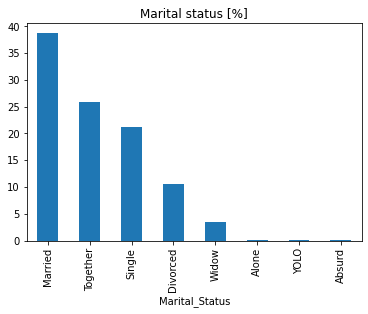

In [0]:
#@title #### Bar chart


(df.groupby('Marital_Status').ID.count()/df.ID.count()*100).sort_values(ascending=False).plot.bar()
plt.title('Marital status [%]');




### 3.3. Age

- Difference beteween current year and birth year (calculated field)
- Median and average age about 50%
- 24 years the minimum age
- 127 years the maximum
  - Three customer are over 100 years old (outliers)
- 75% are up to 61 years old
- 90% are up to 70 years old

In [0]:
#@title #### Describe
df['Age'].describe()




count    2215.000000
mean       51.183296
std        11.987000
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

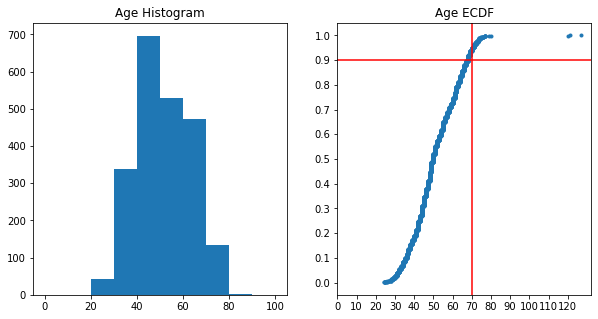

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['Age'],"Age Histogram", 70,.9,"Age ECDF")

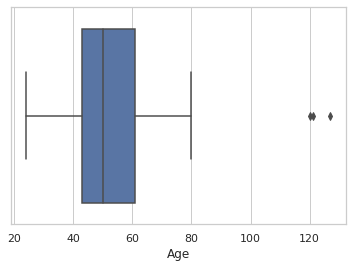

In [0]:
#@title #### Boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

In [0]:
#@title #### Outliers
df[df['Age']>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_K,Age,Peoplehome,LifetimeDays,LifetimeYears,MntTotal,NumTotalPurchases,AvgPrice,AvgMntLifetimeYear,AvgPurchaseLifetimeYear,TotalCmpAccepted,AcceptedAnyCmp,Age_Range,Income_Range
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,36.640,120,1,2420,6.816901,40,5,8.000000,5.867769,0.733471,0,False,"(80, 130]","(30, 40]"
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,60.182,127,1,2187,6.160563,20,3,6.666667,3.246456,0.486968,0,False,"(80, 130]","(60, 70]"
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,83.532,121,0,2420,6.816901,1629,14,116.357143,238.964876,2.053719,1,True,"(80, 130]","(80, 90]"


### 3.4. Income

- 50k is the median and average
- Min 1730 (outlier)
  - Six rows under 5k income
- Max 666.666 (outlier)
 - One row greater than 200k income (666k)
- 75% are up to $68k per year
- 90% are up to 80k


In [0]:
#@title ####Describe

df["Income"].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

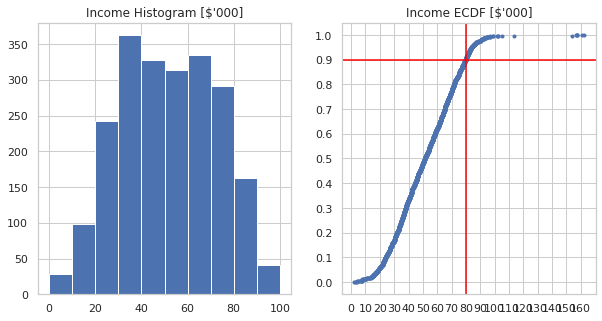

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['Income_K'],"Income Histogram [$'000]", 80,.9,"Income ECDF [$'000]")

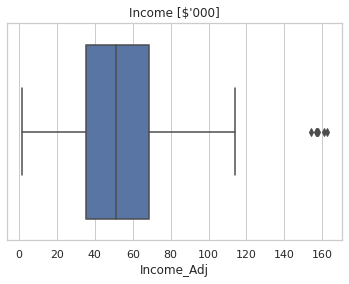

In [0]:
#@title #### Boxplot
df_income = df[df["Income"]<=200000].copy()
df_income['Income_Adj'] = df['Income']/1000
plt.title("Income [$'000]");
ax = sns.boxplot(x=df_income['Income_Adj'])

In [0]:
#@title #### Outliers
print("Income > 200k")
print(df[df["Income"]>200000].ID.count())
print("\n")
print("Income < 5k")
df[df["Income"]<5000].ID.count()


Income > 200k
0


Income < 5k


6

### 3.5. Kid Home

- Almost 60% without kids
- 40% has 1 kid at home
- 2% with 2 kids

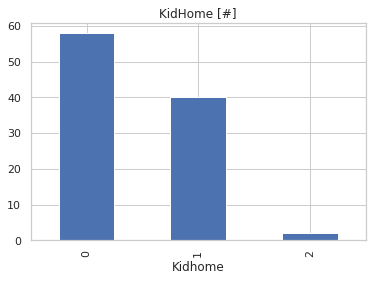

In [0]:
#@title #### Bar Chart
(df.groupby('Kidhome').ID.count()/df.ID.count()*100).sort_values(ascending=False).plot.bar()

plt.title('KidHome [#]');


In [0]:
#@title #### Table
(df.groupby('Kidhome').ID.count()/df.ID.count()*100).sort_values(ascending=False)

Kidhome
0    57.923251
1    40.000000
2     2.076749
Name: ID, dtype: float64

### 3.5. Teen Home

- Almost 50% without teens
- 45% with one teen at home
- 2% with 2 teens

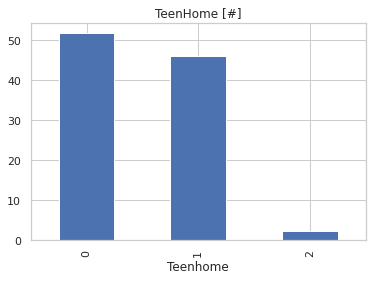

In [0]:
#@title #### Bar Chart
(df.groupby('Teenhome').ID.count()/df.ID.count()*100).sort_values(ascending=False).plot.bar()

plt.title('TeenHome [#]');


In [0]:
#@title #### Table
(df.groupby('Teenhome').ID.count()/df.ID.count()*100).sort_values(ascending=False)

Teenhome
0    51.738149
1    45.959368
2     2.302483
Name: ID, dtype: float64

### 3.6. People Home

- Kids + teens (calculated field)
- 70% with at least 1 person at home
- 30% without other people at home 

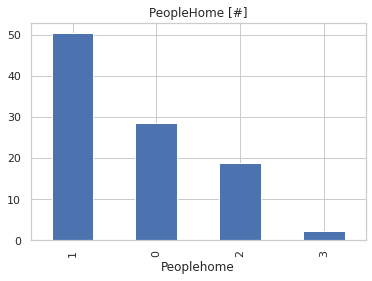

In [0]:
#@title #### Bar Chart
(df.groupby('Peoplehome').ID.count()/df.ID.count()*100).sort_values(ascending=False).plot.bar()

plt.title('PeopleHome [#]');


In [0]:
#@title #### Table
(df.groupby('Peoplehome').ID.count()/df.ID.count()*100).sort_values(ascending=False)

Peoplehome
1    50.383747
0    28.577878
2    18.781038
3     2.257336
Name: ID, dtype: float64

### 3.7. Lifetime Years


- Customer Lifetime in years (calculated field)
- 7 years are the median and average
- Max of 8 years
- Min of 6 years
- Loyal customers 


In [0]:
#@title #### Describe
df['LifetimeYears'].describe()


count    2215.000000
mean        7.035222
std         0.570363
min         6.039437
25%         6.546479
50%         7.039437
75%         7.529577
max         8.008451
Name: LifetimeYears, dtype: float64

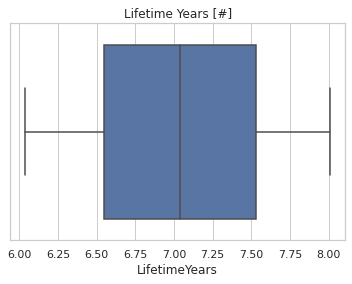

In [0]:
#@title #### Boxplot
plt.title("Lifetime Years [#]");
ax = sns.boxplot(x=df['LifetimeYears'])

### 3.8. Recency

 

- Number of days since last purchase
- Mean and average of 50 days
- Min 0 days
- Max 99 days
- Distributed equally (Platto)

In [0]:
#@title #### Recency
df['Recency'].describe()

count    2215.000000
mean       49.024379
std        28.949608
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

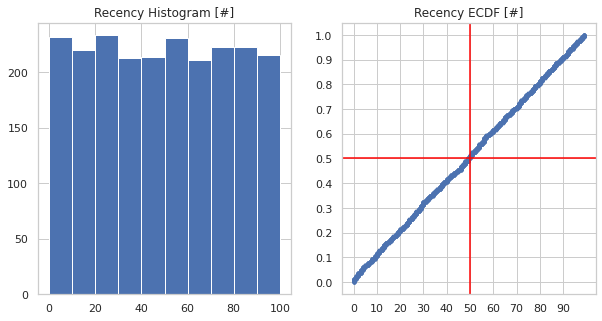

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['Recency'],"Recency Histogram [#]", 50,.5,"Recency ECDF [#]")

### 3.9 MntWines

- Amout spent on wines in the last 2 years
- $303 in average
- Median of 173
- Max 1493
- 75% up to 504 dollars
- Std of 336
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntWines'].describe()

count    2215.000000
mean      305.225282
std       337.345380
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

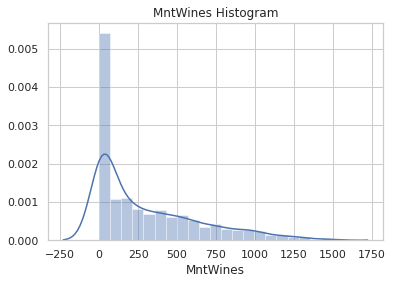

In [0]:
#@title ####Histogram
sns.distplot(df['MntWines']);
plt.title('MntWines Histogram');

### 3.10 MntMeatProducts

- Amout spent on meat in the last 2 years
- $167 in average
- Mean of 68
- Max 1725 (check)
- 75% up to 232 dollars
- Std of 225
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntMeatProducts'].describe()

count    2215.000000
mean      167.063205
std       224.311559
min         0.000000
25%        16.000000
50%        68.000000
75%       232.500000
max      1725.000000
Name: MntMeatProducts, dtype: float64

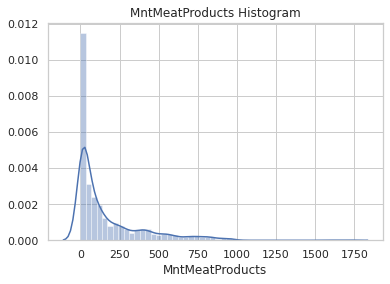

In [0]:
#@title ####Histogram
sns.distplot(df['MntMeatProducts']);
plt.title('MntMeatProducts Histogram');

### 3.11 MntFishProducts

- Amout spent on fish products in the last 2 years
- $37 in average
- Mean of 12
- Max 259
- 75% up to 50 dollars
- Std of 54
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntFishProducts'].describe()

count    2215.000000
mean       37.651016
std        54.760822
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

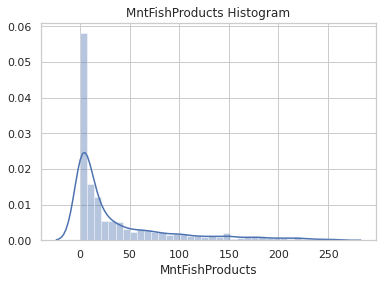

In [0]:
#@title ####Histogram
sns.distplot(df['MntFishProducts']);
plt.title('MntFishProducts Histogram');

### 3.12 MntFruits

- Amout spent on fruits in the last 2 years
- $26 in average
- Mean of 8
- Max 199
- 75% up to 33 dollars
- Std of 39
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntFruits'].describe()

count    2215.000000
mean       26.361625
std        39.802036
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

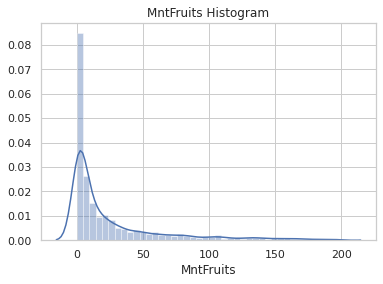

In [0]:
#@title ####Histogram
sns.distplot(df['MntFruits']);
plt.title('MntFruits Histogram');

### 3.13 MntSweetProducts

- Amout spent on sweet products in the last 2 years
- $27 in average
- Mean of 8
- Max 263
- 75% up to 33 dollars
- Std of 41
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntSweetProducts'].describe()

count    2215.000000
mean       27.040632
std        41.077594
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64

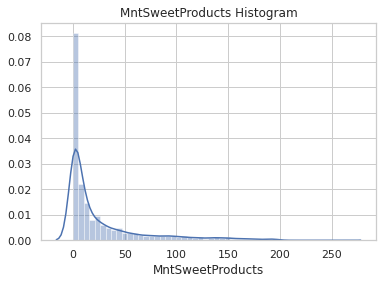

In [0]:
#@title ####Histogram
sns.distplot(df['MntSweetProducts']);
plt.title('MntSweetProducts Histogram');

### 3.14 MntGoldProds

- Amout spent on gold products in the last 2 years
  - Regarding the product categories above
- $44 in average
- Mean of 24
- Max 362
- 75% up to 56 dollars
- Std of 52
- Right Skewed Distribution

In [0]:
#@title ####Describe
df['MntGoldProds'].describe()

count    2215.000000
mean       43.979684
std        51.822660
min         0.000000
25%         9.000000
50%        25.000000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64

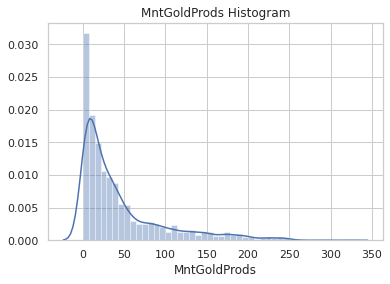

In [0]:
#@title ####Histogram
sns.distplot(df['MntGoldProds']);
plt.title('MntGoldProds Histogram');

### 3.15 MntTotal

- Total Amout spent on products in the last 2 years (calculated field)
- 1.2 milion spent in five categories:
  - 680k wines (54%)
  - 373k meats (29%)
  - 83k fishs (6%)
  - 60k sweets (5%)
  - 58k fruits (4%)
- Gold products represents 8% (98k)
  - 92% are regular products
- $400 Median of total amount 

In [0]:
#@title Total Amount and Amount by categories
print("MntTotal: " + df['MntTotal'].sum().astype(str))
print("MntWines: " + df['MntWines'].sum().astype(str))
print("MntMeatProducts: " + df['MntMeatProducts'].sum().astype(str))
print("MntFishProducts: " + df['MntFishProducts'].sum().astype(str))
print("MntSweetProducts: " + df['MntSweetProducts'].sum().astype(str))
print("MntFruits: " + df['MntFruits'].sum().astype(str))


print("\nMntGoldProds: " + df['MntGoldProds'].sum().astype(str))



MntTotal: 1247802
MntWines: 676074
MntMeatProducts: 370045
MntFishProducts: 83397
MntSweetProducts: 59895
MntFruits: 58391

MntGoldProds: 97415


In [0]:
#@title ####Describe
df['MntTotal'].describe()

count    2215.000000
mean      563.341761
std       577.210658
min         4.000000
25%        55.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: MntTotal, dtype: float64

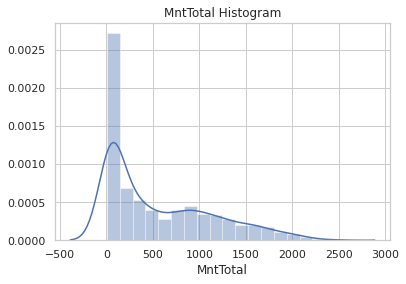

In [0]:
#@title ####Histogram
sns.distplot(df['MntTotal']);
plt.title('MntTotal Histogram');

### 3.16 NumCatalogPurchases

- Number of purchases made using catalog
- Avarage and median of 2 purchases
- Max 28
- 75% up to 4

In [0]:
#@title ####Describe
df['NumCatalogPurchases'].describe()

count    2215.000000
mean        2.671783
std         2.927179
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

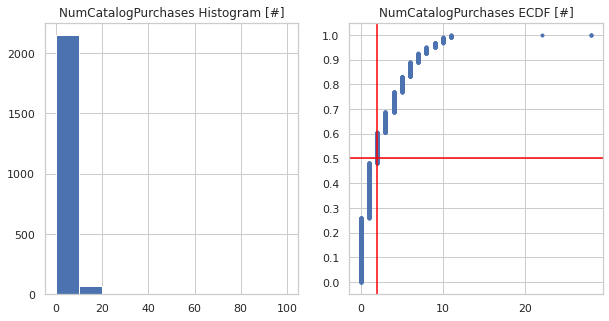

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['NumCatalogPurchases'],"NumCatalogPurchases Histogram [#]", 2,.5,"NumCatalogPurchases ECDF [#]")

### 3.17 NumStorePurchases

- Number of purchases made directly in stores
- Average and median at 5 purchases
- Max 13
- 75% up to 8

In [0]:
#@title ####Describe
df['NumStorePurchases'].describe()

count    2215.000000
mean        5.802257
std         3.250974
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

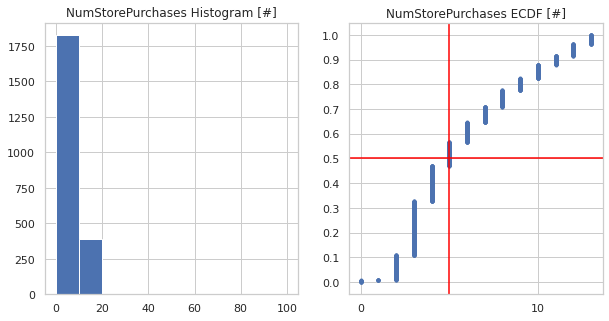

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['NumStorePurchases'],"NumStorePurchases Histogram [#]", 5,.5,"NumStorePurchases ECDF [#]")

### 3.18 NumWebPurchases

- Number of purchases made through company´s website
- Average and median at 4 purchases
- Max 27
- 75% up to 6

In [0]:
#@title ####Describe
df['NumWebPurchases'].describe()

count    2215.000000
mean        4.085779
std         2.741473
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

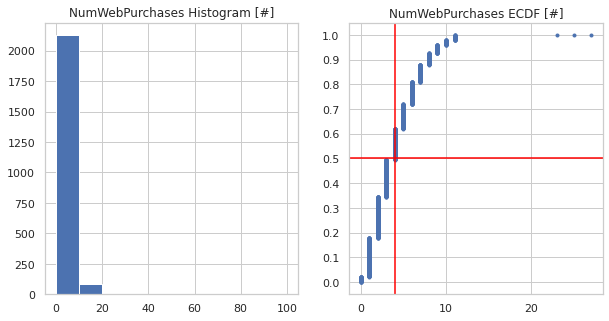

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['NumWebPurchases'],"NumWebPurchases Histogram [#]", 4,.5,"NumWebPurchases ECDF [#]")

### 3.19 NumTotalPurchases

- Number of total purchases (calculated field)
- 28083 purchases at: 
  - Store 12970 (46%)
  - Web 9150 (32%)
  - Catalog 5963 (22%)
- Made with discount 5145 (18%)

In [0]:
#@title #### Total purchases and purchases by local

print("Total purchases: " + df['NumTotalPurchases'].sum().astype(str))
print("Catalog purchases: " + df['NumCatalogPurchases'].sum().astype(str))
print("Store purchases: " + df['NumStorePurchases'].sum().astype(str))
print("Web purchases: " + df['NumWebPurchases'].sum().astype(str))

Total purchases: 27820
Catalog purchases: 5918
Store purchases: 12852
Web purchases: 9050


In [0]:
#@title ####Describe
df['NumTotalPurchases'].describe()

count    2215.000000
mean       12.559819
std         7.205270
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumTotalPurchases, dtype: float64

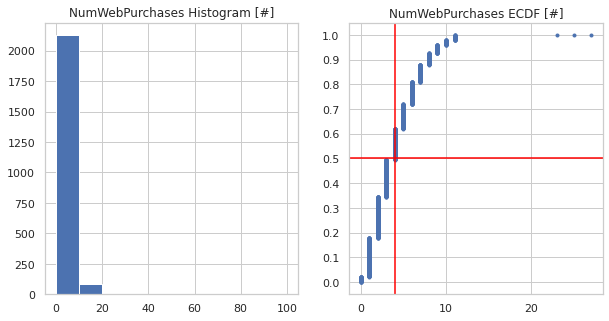

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['NumWebPurchases'],"NumWebPurchases Histogram [#]", 4,.5,"NumWebPurchases ECDF [#]")

### 3.20 NumDealsPurchases

- Number of purchases made with discount
- Average and median equal $2 
- 75% up to 3

In [0]:
#@title ####Describe
df['NumDealsPurchases'].describe()

count    2215.000000
mean        2.322799
std         1.923820
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

In [0]:
df['NumDealsPurchases'].sum()

5145

### 3.21 AvgPrice

- Inconsistence: total amount informed and number of total purchases inexistent
- Mean Avg price of 34. Median in 26
- 75% up to 45

In [0]:
#@title ####Describe
df_avg = df[(df['MntTotal']>0) & (df['NumTotalPurchases']>0)]
df_avg['AvgPrice'].describe()

count    2209.000000
mean       34.311429
std        29.045946
min         1.520000
25%        10.250000
50%        26.384615
75%        45.733333
max       176.000000
Name: AvgPrice, dtype: float64

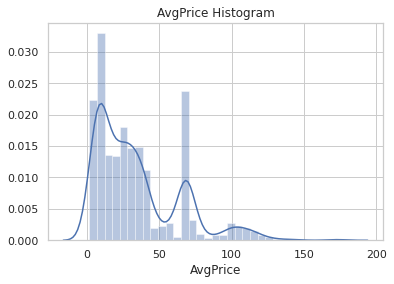

In [0]:
#@title ####Histogram
sns.distplot(df_avg['AvgPrice']);
plt.title('AvgPrice Histogram');

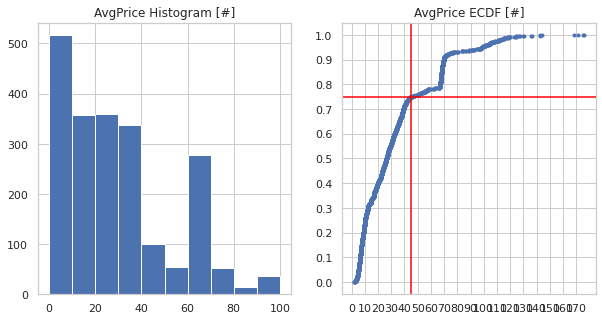

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df_avg['AvgPrice'],"AvgPrice Histogram [#]", 45,.75,"AvgPrice ECDF [#]")

### 3.22 NumWebVisitsMonth

- Number website visits last month
- 50% made 6 visits
- 90% made 7 visits

In [0]:
#@title ####Describe
df['NumWebVisitsMonth'].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

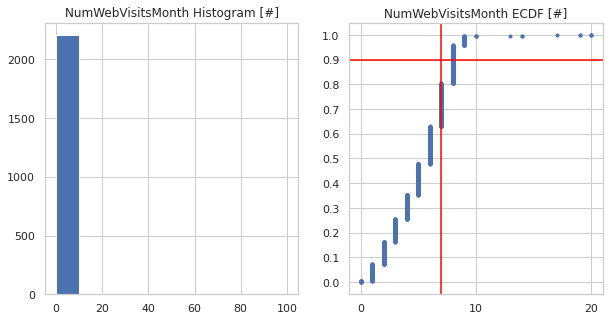

In [0]:
#@title ####Histogram and ECDF
plot_doble_ecdf(df['NumWebVisitsMonth'],"NumWebVisitsMonth Histogram [#]",7,.9,"NumWebVisitsMonth ECDF [#]")

### 3.23 AvgMntLifetimeYear

- Average amount spent per year (calculated field)
- 50% spent up to 46 dollar per year
- 75% up to 137

In [0]:
#@title ####Describe
df['AvgMntLifetimeYear'].describe()

count    2215.000000
mean       79.602500
std        81.533971
min         0.549111
25%         8.095514
50%        47.262867
75%       137.621748
max       378.199561
Name: AvgMntLifetimeYear, dtype: float64

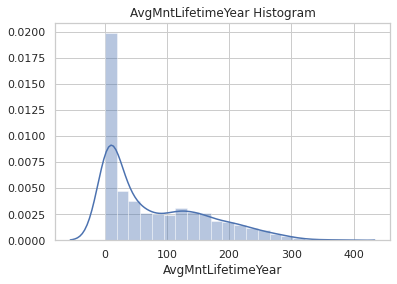

In [0]:
#@title ####Histogram
sns.distplot(df['AvgMntLifetimeYear']);
plt.title('AvgMntLifetimeYear Histogram');

### 3.24 AvgPurchaseLifetimeYear


- Average purchases made per year (calculated field)
- 50% made up to 1.7 purchases
- 75% up to 2.6

In [0]:
#@title ####Describe
df['AvgPurchaseLifetimeYear'].describe()

count    2215.000000
mean        1.783393
std         1.017343
min         0.000000
25%         0.822521
50%         1.720731
75%         2.629690
max         4.899822
Name: AvgPurchaseLifetimeYear, dtype: float64

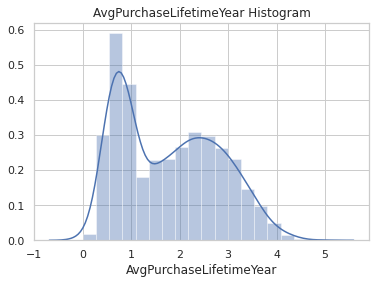

In [0]:
#@title ####Histogram
sns.distplot(df['AvgPurchaseLifetimeYear']);
plt.title('AvgPurchaseLifetimeYear Histogram');

### 3.25 AcceptedCmp


- Who accepted the offer in the campaings (1st to 5th)
- 1st: 6%
- 2nd: 1%
- 3rd: 7%
- 4th: 7%
- 5th: 7%

In [0]:
#@title ####Table
print(df.ID.count())
print(df.groupby('AcceptedCmp1').ID.count())
print(df.groupby('AcceptedCmp2').ID.count())
print(df.groupby('AcceptedCmp3').ID.count())
print(df.groupby('AcceptedCmp4').ID.count())
print(df.groupby('AcceptedCmp5').ID.count())

2215
AcceptedCmp1
0    2073
1     142
Name: ID, dtype: int64
AcceptedCmp2
0    2185
1      30
Name: ID, dtype: int64
AcceptedCmp3
0    2052
1     163
Name: ID, dtype: int64
AcceptedCmp4
0    2051
1     164
Name: ID, dtype: int64
AcceptedCmp5
0    2053
1     162
Name: ID, dtype: int64


### 3.26 Response


- Who accepted the offer in the last campaing (6th)
- 15% success

In [0]:
#@title ####Table
print(df.ID.count())
print(df.groupby('Response').ID.count())

2215
Response
0    1882
1     333
Name: ID, dtype: int64


### 3.27 Complain


- Who complained in the last 2 years
- Less than 1%

In [0]:
#@title ####Table
print(df.ID.count())
print(df.groupby('Complain').ID.count())

2215
Complain
0    2194
1      21
Name: ID, dtype: int64


### 3.28 DtCustomer


- Who complained in the last 2 years
- Less than 1%

In [0]:
#@title ####Table
print(df.ID.count())
print(df.groupby('Complain').ID.count())

2215
Complain
0    2194
1      21
Name: ID, dtype: int64


## 4. Correlation

### 4.1. Income X MntTotal (KidHome)

- Spending increases when income is higher
- Customers with kids spent less
- Customers with kids earn less

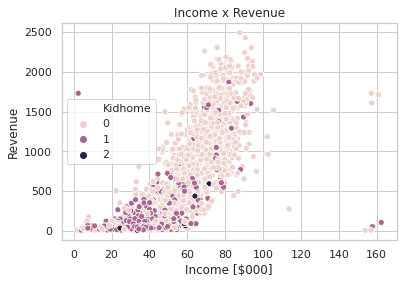

In [0]:
#@title Scatter
ax = sns.scatterplot(x=df['Income_K'], y=df['MntTotal'], hue=df['Kidhome'], data=df)
plt.title("Income x Revenue")
plt.xlabel('Income [$''000]')
plt.ylabel('Revenue')
sns.set(rc={'figure.figsize':(11,8)})


### 4.2. Income X MntTotal (TotalCmpAccepted)

- Customers that accepted more than one campaing are at the top of speding and income.

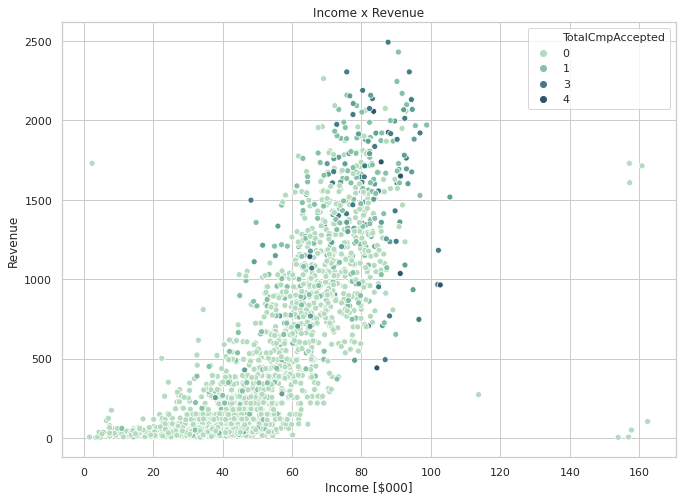

In [0]:
#@title Scatter
sns.set_style("whitegrid")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True,rot=-.4)
ax = sns.scatterplot(x=df['Income_K'], y=df['MntTotal'], hue=df['TotalCmpAccepted'], data=df, palette=cmap)
plt.title("Income x Revenue")
plt.xlabel('Income [$''000]')
plt.ylabel('Revenue')
sns.set(rc={'figure.figsize':(11,8)})




- Median of total amount for PhDs is $450

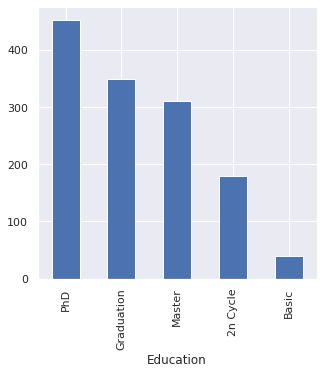

In [0]:
#@title MntTotal median
df.groupby('Education').MntTotal.median().sort_values(ascending=False).plot.bar(figsize=(5,5));

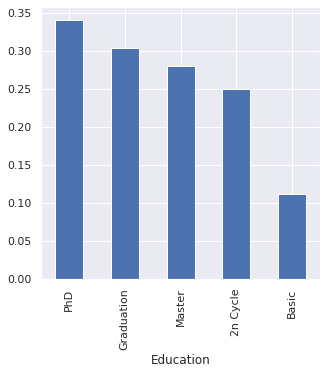

In [0]:
#@title MntTotal median
df.groupby('Education').TotalCmpAccepted.mean().sort_values(ascending=False).plot.bar(figsize=(5,5));

### 4.3. Income X MntTotal (Education)

- Basic education customers are those who spend less and earn less

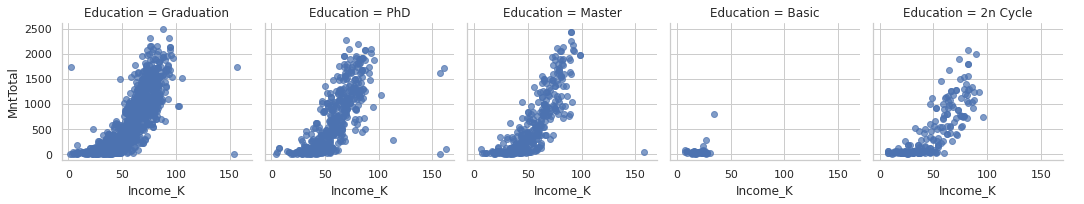

In [0]:
#@title Scatter
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="Education")
g.map(plt.scatter, "Income_K", "MntTotal", alpha=.7)
g.add_legend();


## 5. Response (Last Campaing)

### 5.1. Customer Response

- Response for the last campaing (Gadget)
- 15% response true (true = 1, false 0)

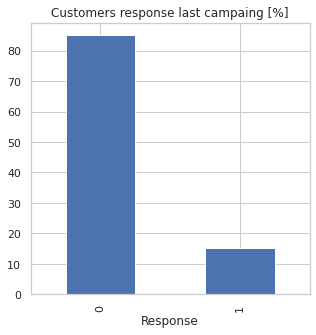

In [0]:
#@title ####Bar Chart
plt.figure(figsize=(5,5))
((df.groupby('Response').ID.count()/df.ID.count())*100).plot.bar();
plt.title("Customers response last campaing [%]");

### 5.2. Total amount by response

- 50% of those who response spent up to 1000 dolars
- 50% of those who NOT response spent up to 300 dolars

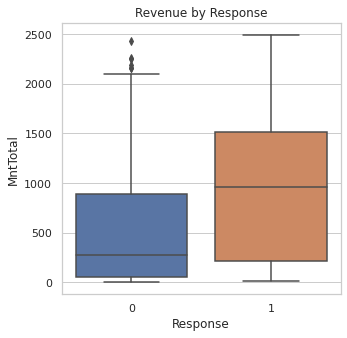

In [0]:
#@title ####Boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Response", y="MntTotal",
                 data=df)
plt.title("Revenue by Response");

In [0]:
#@title ####Describe
df.groupby('Response').MntTotal.describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1882.0,499.454835,527.990232,4.0,49.25,271.0,884.75,2429.0
1,333.0,924.408408,698.913637,14.0,219.00,964.0,1517.00,2491.0


### 5.3. Response by Campaing Accepted

- 40% of those who accepted at least 1 campaing answered true in last campaing. 

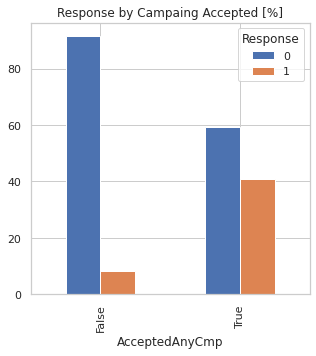

In [0]:
#@title #### Bar chart
sns.set_style("whitegrid")
((df.groupby(['AcceptedAnyCmp','Response']).ID.count())/df.groupby(['AcceptedAnyCmp']).ID.count()*100).unstack().plot.bar(figsize=(5,5));
plt.title("Response by Campaing Accepted [%]");

# Others

In [0]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_K,Age,Peoplehome,LifetimeDays,LifetimeYears,MntTotal,NumTotalPurchases,AvgPrice,AvgMntLifetimeYear,AvgPurchaseLifetimeYear,TotalCmpAccepted,AcceptedAnyCmp,Age_Range,Income_Range
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58.138,63,0,2807,7.907042,1529,22,69.500000,193.371927,2.782330,0,False,"(60, 70]","(50, 60]"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,46.344,66,2,2257,6.357746,21,4,5.250000,3.303057,0.629154,0,False,"(60, 70]","(40, 50]"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,71.613,55,0,2456,6.918310,734,20,36.700000,106.095277,2.890879,0,False,"(50, 60]","(70, 80]"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,26.646,36,1,2283,6.430986,48,6,8.000000,7.463863,0.932983,0,False,"(30, 40]","(20, 30]"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,58.293,39,1,2305,6.492958,407,14,29.071429,62.683297,2.156182,0,False,"(30, 40]","(50, 60]"


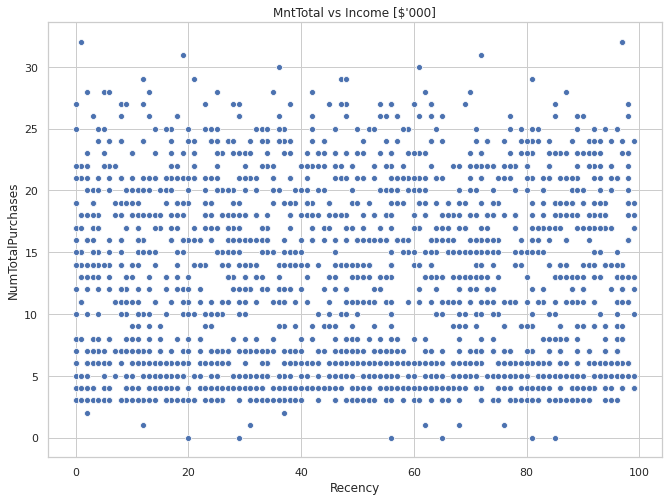

In [0]:
#@title Scatter
ax = sns.scatterplot(x=df['Recency'], y=df['NumTotalPurchases'], data=df)
plt.title("MntTotal vs Income [$'000]")
sns.set(rc={'figure.figsize':(11,8)})


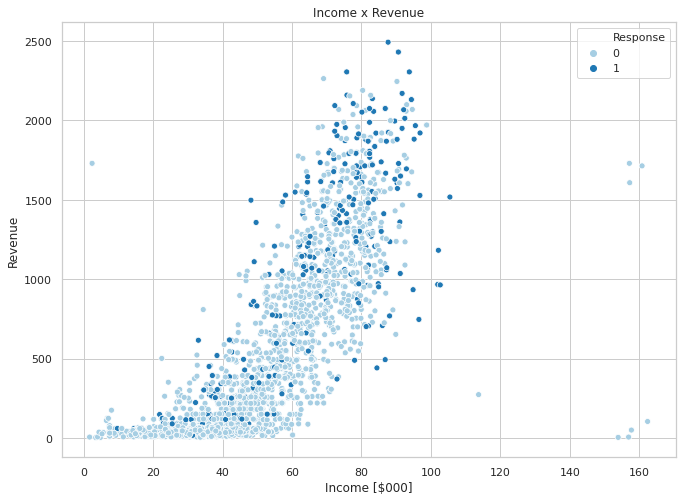

In [0]:
#@title Scatter
sns.set_style("whitegrid")
ax = sns.scatterplot(x=df['Income_K'], y=df['MntTotal'], hue=df['Response'], data=df,palette="Paired")
plt.title("Income x Revenue")
plt.xlabel('Income [$''000]')
plt.ylabel('Revenue')
sns.set(rc={'figure.figsize':(11,8)})




In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       2215 non-null   int64   
 1   Year_Birth               2215 non-null   int64   
 2   Education                2215 non-null   object  
 3   Marital_Status           2215 non-null   object  
 4   Income                   2215 non-null   float64 
 5   Kidhome                  2215 non-null   int64   
 6   Teenhome                 2215 non-null   int64   
 7   Dt_Customer              2215 non-null   object  
 8   Recency                  2215 non-null   int64   
 9   MntWines                 2215 non-null   int64   
 10  MntFruits                2215 non-null   int64   
 11  MntMeatProducts          2215 non-null   int64   
 12  MntFishProducts          2215 non-null   int64   
 13  MntSweetProducts         2215 non-null   int64   
 14  MntGoldP